已经学习了如何⽤⼩批量随机梯度下降训练模型。然⽽当实现该算法时，我们只考虑了通过前向传播（forward propagation）所涉及的计算。在计算梯度时，我们只调⽤了深度学习框架提供的反向传播函数，⽽不知其所以然。
梯度的⾃动计算（⾃动微分）⼤⼤简化了深度学习算法的实现。在⾃动微分之前，即使是对复杂模型的微⼩调整也需要⼿⼯重新计算复杂的导数，学术论⽂也不得不分配⼤量⻚⾯来推导更新规则。本节将通过⼀些基本的数学和计算图，深⼊探讨反向传播的细节。

## 前向传播计算图
正⽅形表⽰变量，圆圈表⽰操作符。左下⻆表⽰输⼊，右上⻆表⽰输出。注意显⽰数据流的箭头⽅向主要是向右和向上的。
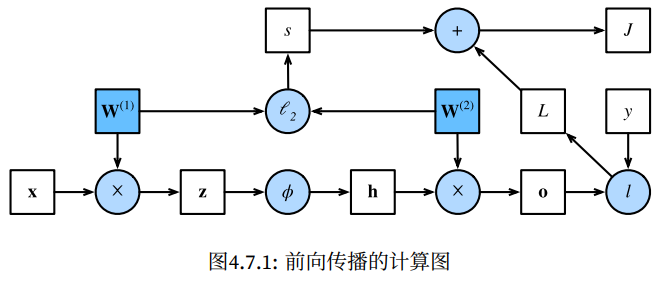

## 反向传播

反向传播（backward propagation或backpropagation）指的是计算神经⽹络参数梯度的⽅法。简⾔之，该⽅法根据微积分中的链式规则，按相反的顺序从输出层到输⼊层遍历⽹络。该算法存储了计算某些参数梯度时所需的任何中间变量（偏导数）。假设我们有函数Y = f(X)和Z = g(Y)，其中输⼊和输出X, Y, Z是任意形状的张量。利⽤链式法则，我们可以计算Z关于X的导数  
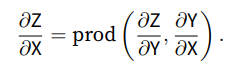  
在这⾥，我们使⽤prod运算符在执⾏必要的操作（如换位和交换输⼊位置）后将其参数相乘。对于向量，这很简单，它只是矩阵-矩阵乘法。对于⾼维张量，我们使⽤适当的对应项。运算符prod指代了所有的这些符号。  
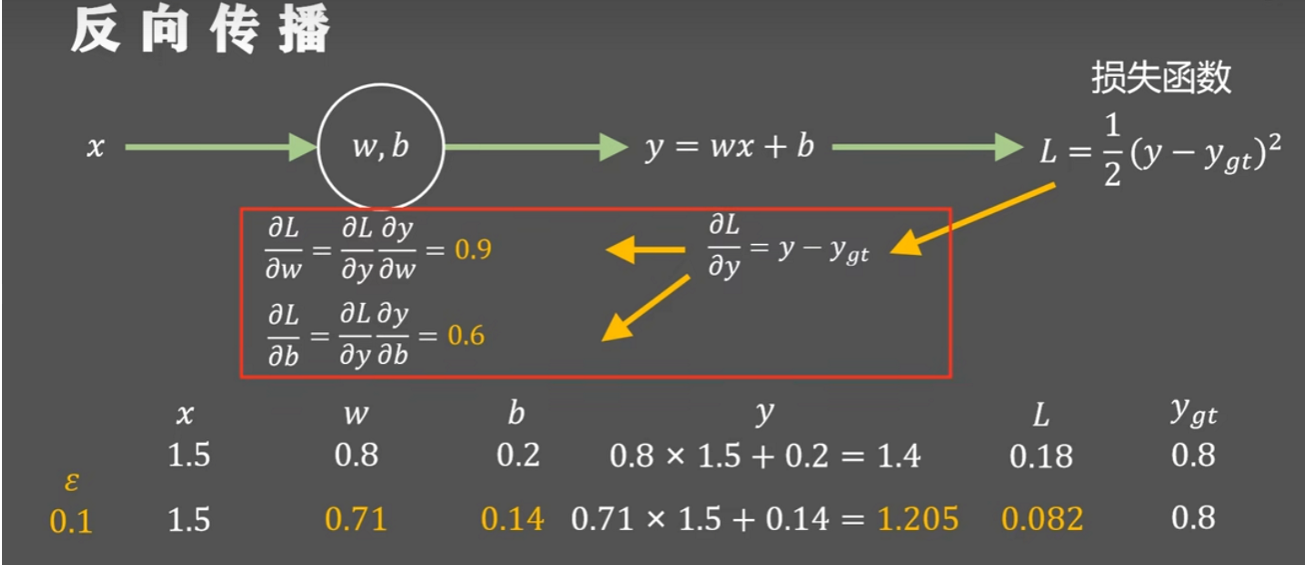  

简单来说，反向传播就是根据函数损失，反向计算权值w和偏置b，然后根据学习率不断更新，最后逼近权值和偏置

## 训练神经网络
在训练神经⽹络时，前向传播和反向传播相互依赖。对于前向传播，我们沿着依赖的⽅向遍历计算图并计算其路径上的所有变量。然后将这些⽤于反向传播，其中计算顺序与计算图的相反。因此，在训练神经⽹络时，在初始化模型参数后，我们交替使⽤前向传播和反向传播，利⽤反向传播给出的梯度来更新模型参数。注意，反向传播重复利⽤前向传播中存储的中间值，以避免重复计算。带来的影响之⼀是我们需要保留中间值，直到反向传播完成。这也是训练⽐单纯的预测需要更多的内存（显存）的原因之⼀。此外，这些中间值的⼤⼩与⽹络层的数量和批量的⼤⼩⼤致成正⽐。因此，使⽤更⼤的批量来训练更深层次的⽹络更容易导致内存不⾜（out of memory）错误。

## 小结
* 前向传播在神经⽹络定义的计算图中按顺序计算和存储中间变量，它的顺序是从输⼊层到输出层。
* 反向传播按相反的顺序（从输出层到输⼊层）计算和存储神经⽹络的中间变量和参数的梯度。
* 在训练深度学习模型时，前向传播和反向传播是相互依赖的。
* 训练⽐预测需要更多的内存(显存)。
